In [12]:
import numpy as np
import time
import dismech

geom = dismech.GeomParams(rod_r0=1e-3,
                          shell_h=0)

material = dismech.Material(density=1273.52,
                            youngs_rod=1e9,
                            youngs_shell=0,
                            poisson_rod=0.5,
                            poisson_shell=0)

static_2d_sim = dismech.SimParams(static_sim=False,
                                  two_d_sim=False,
                                  use_mid_edge=False,
                                  use_line_search=False,
                                  show_floor=False,
                                  log_data=True,
                                  log_step=1,
                                  dt=1e-2,
                                  max_iter=25,
                                  total_time=10.0,
                                  plot_step=1,
                                  tol=1e-4,
                                  ftol=1e-4,
                                  dtol=1e-2)

env = dismech.Environment()
env.add_force('gravity', g=np.array([0.0, 0.0, -9.81]))

geo = dismech.Geometry.from_txt('helix_n106.txt')

robot = dismech.SoftRobot(geom, material, geo, static_2d_sim, env)

In [13]:
fixed_points = np.array([0, 1])
robot = robot.fix_nodes(fixed_points)
stepper = dismech.NewmarkBetaTimeStepper(robot)
start = time.time()
robots = stepper.simulate()
end = time.time()
qs = np.stack([robot.state.q for robot in robots])

In [14]:
print(end - start)

42.13511633872986


In [ ]:
t = np.arange(robot.sim_params.total_time, step=robot.sim_params.dt)
options = dismech.AnimationOptions(title='Hexli (N=106)')

fig = dismech.get_interactive_animation_plotly(robot, t, qs, options)
fig.show()

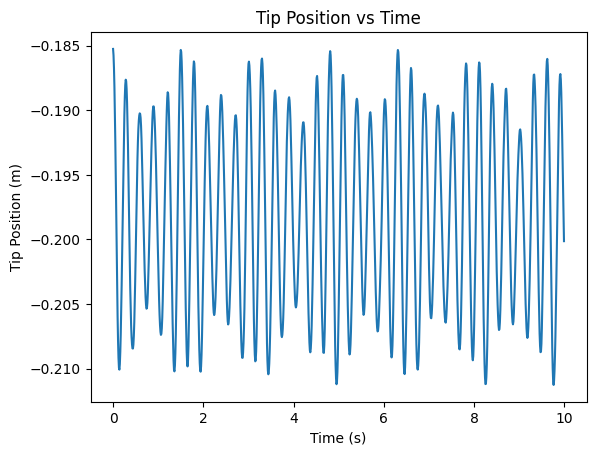

In [ ]:
import matplotlib.pyplot as plt
plt.plot(t, qs[:, robot.end_node_dof_index-1])
plt.title("Tip Position vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Tip Position (m)")
plt.show()